# Comparison of two numerical methods
In this notebook, we will compare the output of FFT (finite difference scheme) solving Burgers equation in physical domain and frequency domain.
$u_t + uu_t = \nu u_{xx}.$

In [6]:

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from MHD_68 import get_matrix


def conv(a,b):
    N = a.shape[0]
    vec = np.zeros(2*N-1, dtype=complex)
    vec = signal.convolve(a,b)
    mid = vec[N-1]
    _vec = np.delete(vec, N-1)
    ls = np.split(_vec, 2)
    
    return np.append(ls[0]+ls[1], mid)

# basic setting
N = 1000
M = 100000
T = 1
dt = T/M
dx = 1/N
s = dt/dx
r = dt/dx**2
v = 0.01

First, we use the FFT in physical domain. The computing data is exported from .txt as the computing is slow.

In [7]:

u0 = get_matrix("t0_u.txt")
_u0 = np.zeros((101, 501))

for i in range(101):
    _u0[i] = np.abs(np.fft.rfft(u0[i])/N)**2


Then, we implement the FFT in frequency domain. 

In [8]:
# initial data
x = np.arange(0, 1, dx)
k = np.arange(0, N,1) #(0, ..., N-1)
f = np.sin(2*np.pi*x) +  3*np.cos(4*np.pi*x) + 5*np.sin(16*np.pi*x) - 7*np.cos(24*np.pi*x)

# run scheme
sin = np.sin(2*np.pi*k/N)
cos = np.cos(2*np.pi*k/N)
linear = 1+ 2*v*r*(cos-1)

F = np.zeros((M+1, N), dtype=complex)

#F[0] = np.fft.fft(f)/N
F[0] = np.fft.fft(f)/N

for i in range(M):
    F[i+1] = F[i] * linear - 1j*s*conv(F[i], sin*F[i])

# compute the energy spectrum
E = np.abs(F)**2


/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Now, we compare the output by making several plots.

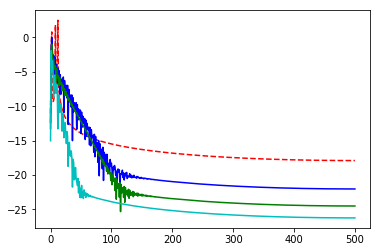

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


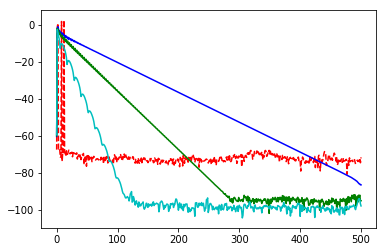

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1001,)

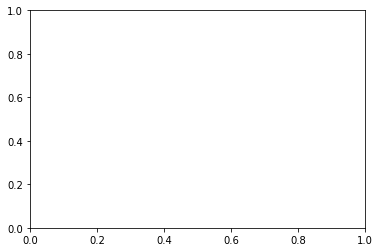

In [11]:

l = np.arange(0, N/2 + 1,1) #(0, ..., N/2)
n = int(N/2 + 1)

plt.plot(l, np.log(_u0[0]), 'r--')
plt.plot(l, np.log(_u0[10]), 'b-')
plt.plot(l, np.log(_u0[20, 0:n]), 'g-')
plt.plot(l, np.log(_u0[50, 0:n]), 'c-')
plt.show()

plt.plot(l, np.log(E[0, 0:n]), 'r--')
plt.plot(l, np.log(E[10000, 0:n]), 'b-')
plt.plot(l, np.log(E[20000, 0:n]), 'g-')
plt.plot(l, np.log(E[50000, 0:n]), 'c-')
plt.show()

plt.plot(x, u0[0], 'r--')
plt.plot(x, u0[10], 'b-')
plt.plot(x, u0[20], 'g-')
plt.plot(x, u0[50], 'c-')
plt.show()

plt.plot(x, np.fft.ifft(N*F[0]), 'r--')
plt.plot(x, np.fft.ifft(N*F[10000]), 'b-')
plt.plot(x, np.fft.ifft(N*F[20000]), 'g-')
plt.plot(x, np.fft.ifft(N*F[50000]), 'c-')
plt.show()
